In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
crime_data = pd.read_csv('Chicago_all.csv')
crime_data['Date'] = pd.to_datetime(crime_data['Date'], format="%m/%d/%Y %I:%M:%S %p")
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10606686,HZ358366,2016-06-20 09:00:00,047XX S INDIANA AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,...,3.0,38.0,17,1178398.0,1873627.0,2016,03/01/2018 03:52:35 PM,41.808541,-87.621195,"(41.808540691, -87.621194998)"
1,10750326,HZ512286,2016-11-12 07:30:00,038XX W 61ST ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,True,False,...,13.0,65.0,03,1151816.0,1863880.0,2016,03/01/2018 03:52:35 PM,41.782357,-87.718948,"(41.782356535, -87.718947917)"
2,11094370,JA440032,2017-09-21 00:15:00,072XX N CALIFORNIA AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,...,50.0,2.0,10,1156443.0,1947707.0,2017,03/01/2018 03:52:35 PM,42.012293,-87.699714,"(42.012293397, -87.699714109)"
3,11118031,JA470589,2017-10-12 19:14:00,055XX W GRAND AVE,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,JAIL / LOCK-UP FACILITY,True,False,...,29.0,19.0,14,1138788.0,1913480.0,2017,03/01/2018 03:52:35 PM,41.918712,-87.765511,"(41.918711651, -87.76551063)"
4,11134189,JA491697,2017-10-30 11:52:00,043XX S TALMAN AVE,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,APARTMENT,True,False,...,12.0,58.0,26,1159425.0,1875711.0,2017,03/01/2018 03:52:35 PM,41.814670,-87.690727,"(41.814669784, -87.690726696)"


In [3]:
print("The number of observations is:", crime_data.shape[0])
print("The number of features:       ", crime_data.shape[1])

The number of observations is: 769808
The number of features:        22


# Before start Analysis

In [4]:
order_crimes = crime_data['Primary Type'].value_counts()

In [5]:
# Exclude low observations categories as outliers
order_crimes = order_crimes.to_frame().rename(columns = {'Primary Type':'Total'}).drop(['HUMAN TRAFFICKING','PUBLIC INDECENCY', 
                                                                         'OTHER NARCOTIC VIOLATION',
                                                                         'NON-CRIMINAL (SUBJECT SPECIFIED)',
                                                                         'NON - CRIMINAL', 'NON-CRIMINAL'], axis='index')

In [6]:
order_crimes.index.values

array(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'BURGLARY', 'NARCOTICS',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE', 'PROSTITUTION',
       'HOMICIDE', 'ARSON', 'LIQUOR LAW VIOLATION', 'GAMBLING',
       'KIDNAPPING', 'STALKING', 'INTIMIDATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'OBSCENITY'], dtype=object)

In [7]:
order_crimes.reset_index(inplace=True)
order_crimes = order_crimes.rename(columns={'index':'Primary Type'})
# Convert to categorical
order_crimes['Primary Type'] = pd.Categorical(order_crimes['Primary Type'],ordered = True, categories = ['THEFT', 'BATTERY',
        'CRIMINAL DAMAGE', 'ASSAULT',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'BURGLARY', 'NARCOTICS',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE', 'PROSTITUTION',
       'HOMICIDE', 'ARSON', 'LIQUOR LAW VIOLATION', 'GAMBLING',
       'KIDNAPPING', 'STALKING', 'INTIMIDATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'OBSCENITY'])

#### From the below barplot we consider that THEFT is the most popular crime in Chicago, followed by BATTERY for the last 3 years overall

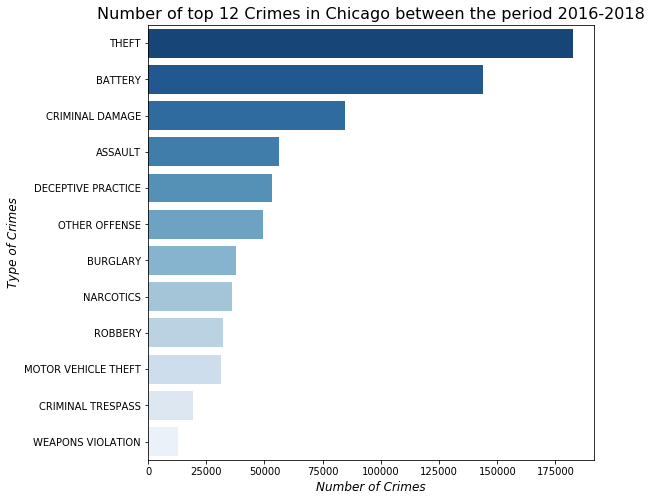

In [8]:
# Count frequencies of crime types
ptype = crime_data['Primary Type'].value_counts()
ptype2 = ptype[:12,]
plt.figure(figsize=(8,8))
sns.barplot(x = ptype2.values, y= ptype2.index, orient = 'h', palette = 'Blues_r')
plt.title('Number of top 12 Crimes in Chicago between the period 2016-2018', fontsize = 16)
plt.ylabel('Type of Crimes', fontsize=12, style='italic')
plt.xlabel('Number of Crimes', fontsize=12, style='italic')
plt.show()

In [9]:
new_date = [d.date() for d in crime_data['Date']]
new_hour = [d.time() for d in crime_data['Date']]
crime_data = crime_data.drop('Date', axis=1)
crime_data.insert(loc = 2, column = 'Date', value=new_date)
crime_data.insert(loc = 3, column = 'Hour', value=new_hour)

# TREND ANALYSIS

## Part I :Trend Analysis for intra year frequency of crimes 

### a. Cumulative data for 3 years (2016-2017-2018)

#### Conduct analysis for 3 years. Find the total number of crimes per month.

In [10]:
crime_data['Date'] = pd.to_datetime(crime_data['Date'], format = '%Y-%m-%d')
crime_data['Hour'] = pd.to_datetime(crime_data['Hour'], format = '%H:%M:%S')
# Find the total crime per month (ignore the year)-use strftime to extract the name of the month
month_crimes = crime_data.groupby(crime_data['Date'].dt.strftime('%B'))['Primary Type'].count().sort_values()

#### From the below barplot we conclude that July and August are the months with the highest criminality, followed by June and May

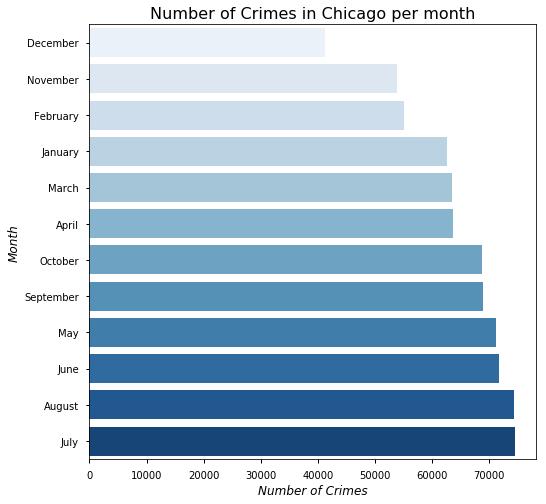

In [11]:
plt.figure(figsize=(8,8))
plt.style.use('seaborn-notebook')
sns.barplot(x = month_crimes.values, y= month_crimes.index, orient = 'h',palette = 'Blues')
plt.title('Number of Crimes in Chicago per month', fontsize = 16)
plt.ylabel('Month', fontsize=12, style='italic')
plt.xlabel('Number of Crimes', fontsize=12, style='italic')
plt.show()

### b. Compare different years 2016, 2017, 2018

### We are going to split the dataset into 3 years and after that we will split every year to a different season (winter,spring,summer,autumn)

In [12]:
# Filter Dataframe with dates and types of crimes
crime_freq = crime_data[['Date', 'Primary Type']]
# Extract the year with strftime and the year as primary index
crime_freq = crime_freq.set_index(crime_freq['Date'].dt.strftime('%Y'))
# Extract month from date
months = crime_freq['Date'].dt.strftime('%B').values
# Insert month as new column
crime_freq.insert(loc = 1, column = 'Month', value= months)
# Drop column of whole date
crime_freq = crime_freq.drop('Date',axis=1)
crime_freq.index = crime_freq.index.rename('Year')
#Set month as primary index
crime_freq = crime_freq.reset_index().set_index('Month')

In [13]:
crime_freq.head()

,Year,Primary Type
Month,,
June,2016,SEX OFFENSE
November,2016,ROBBERY
September,2017,DECEPTIVE PRACTICE
October,2017,CRIMINAL DAMAGE
October,2017,OTHER OFFENSE


In [14]:
# Add new column Season which represents the four seasons(winter, spring, summer, autumn)
crime_freq['Season']= 'NaN'
# Seasonalities
crime_freq.loc[['December', 'January', 'February'], ['Season']] = 'Dec-Jan-Feb' # Winter
crime_freq.loc[['March','April','May'],['Season']] = 'Mar-Apr-May' # Spring
crime_freq.loc[['June','July','August'],['Season']] = 'Jun-Jul-Aug' #Summer
crime_freq.loc[['September','October','November'],['Season']] = 'Sep-Oct-Nov'#Autumn

In [15]:
# Create multiple index with Year, Month and Season
crime_freq = crime_freq.reset_index().set_index(['Year','Month','Season'])

In [16]:
crime_freq.head()

Primary Type
Year Month     Season                         
2016 June      Jun-Jul-Aug         SEX OFFENSE
     November  Sep-Oct-Nov             ROBBERY
2017 September Sep-Oct-Nov  DECEPTIVE PRACTICE
     October   Sep-Oct-Nov     CRIMINAL DAMAGE
               Sep-Oct-Nov       OTHER OFFENSE

In [17]:
# Find the total number of crimes grouped by Year, Season and type. Return a dataframe with a new column with total crimes
total_crimes = crime_freq.groupby(['Year','Season','Primary Type'])['Primary Type'].count().reset_index(name='Total')
total_crimes.head()

,Year,Season,Primary Type,Total
0,2016,Dec-Jan-Feb,ARSON,110
1,2016,Dec-Jan-Feb,ASSAULT,3726
2,2016,Dec-Jan-Feb,BATTERY,10670
3,2016,Dec-Jan-Feb,BURGLARY,3324
4,2016,Dec-Jan-Feb,CONCEALED CARRY LICENSE VIOLATION,9


In [18]:
#Create multiindex dataframe
multi_total_crimes = total_crimes.set_index(['Year','Primary Type', 'Season'])
multi_total_crimes.head()

Total
Year Primary Type                      Season            
2016 ARSON                             Dec-Jan-Feb    110
     ASSAULT                           Dec-Jan-Feb   3726
     BATTERY                           Dec-Jan-Feb  10670
     BURGLARY                          Dec-Jan-Feb   3324
     CONCEALED CARRY LICENSE VIOLATION Dec-Jan-Feb      9

In [19]:
# Filter observations of total crimes >=500 and sort values. Consider that observations under 500 crimes are more rare. We should
# be able to examine these cases in a seperate analysis with different scope.
multi_total_crimes = multi_total_crimes[multi_total_crimes['Total'] >=500].sort_values('Total')
#Split into 3 dataframes based on year
crime_2016 = multi_total_crimes[multi_total_crimes.index.get_level_values(0)=='2016']
crime_2017 = multi_total_crimes[multi_total_crimes.index.get_level_values(0)=='2017']
crime_2018 = multi_total_crimes[multi_total_crimes.index.get_level_values(0)=='2018']

## i. 2016

In [20]:
# Split seasons for 2016
crime_2016_winter = crime_2016[crime_2016.index.get_level_values(2)=='Dec-Jan-Feb']
crime_2016_spring = crime_2016[crime_2016.index.get_level_values(2)=='Mar-Apr-May']
crime_2016_summer = crime_2016[crime_2016.index.get_level_values(2)=='Jun-Jul-Aug']
crime_2016_autumn = crime_2016[crime_2016.index.get_level_values(2)=='Sep-Oct-Nov']

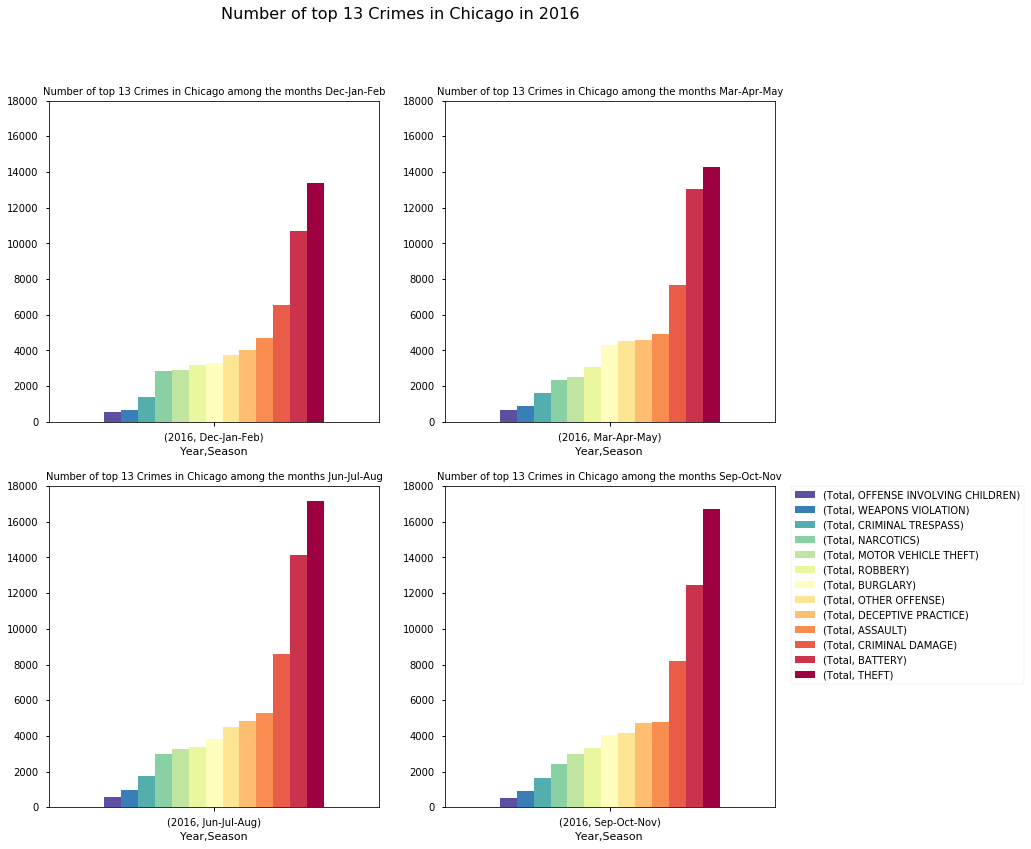

In [21]:
# Create a suplot for every season (winter,spring,summer,autumn ) in 2016
fig, ax = plt.subplots(2,2,figsize = (13,13))

# Set titles
fig.suptitle('Number of top 13 Crimes in Chicago in 2016', fontsize = 16)
ax[0,0].set_title('Number of top 13 Crimes in Chicago among the months Dec-Jan-Feb', fontsize = 10)
ax[0,1].set_title('Number of top 13 Crimes in Chicago among the months Mar-Apr-May', fontsize = 10)
ax[1,0].set_title('Number of top 13 Crimes in Chicago among the months Jun-Jul-Aug', fontsize = 10)
ax[1,1].set_title('Number of top 13 Crimes in Chicago among the months Sep-Oct-Nov', fontsize = 10)
ax[0,0].set_ylim(0,18000)
ax[0,1].set_ylim(0,18000)
ax[1,0].set_ylim(0,18000)
ax[1,1].set_ylim(0,18000)
# Plot
crime_2016_winter.unstack(1).plot(kind = 'bar',ax=ax[0,0],width=1, linewidth = 4, rot=0,colormap="Spectral_r",legend=False)
crime_2016_spring.unstack(1).plot(kind = 'bar',ax=ax[0,1],width=1, linewidth = 4, rot=0,colormap="Spectral_r",legend=False)
crime_2016_summer.unstack(1).plot(kind = 'bar',ax=ax[1,0],width=1, linewidth = 4, rot=0,colormap="Spectral_r",legend=False)
crime_2016_autumn.unstack(1).plot(kind = 'bar',ax=ax[1,1],width=1, linewidth = 4, rot=0,colormap="Spectral_r")
#plt.legend(multi_total_crimes.index.get_level_values(1))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## ii. 2017

In [22]:
#Split seasons for 2017
crime_2017_winter = crime_2017[crime_2017.index.get_level_values(2)=='Dec-Jan-Feb']
crime_2017_spring = crime_2017[crime_2017.index.get_level_values(2)=='Mar-Apr-May']
crime_2017_summer = crime_2017[crime_2017.index.get_level_values(2)=='Jun-Jul-Aug']
crime_2017_autumn = crime_2017[crime_2017.index.get_level_values(2)=='Sep-Oct-Nov']

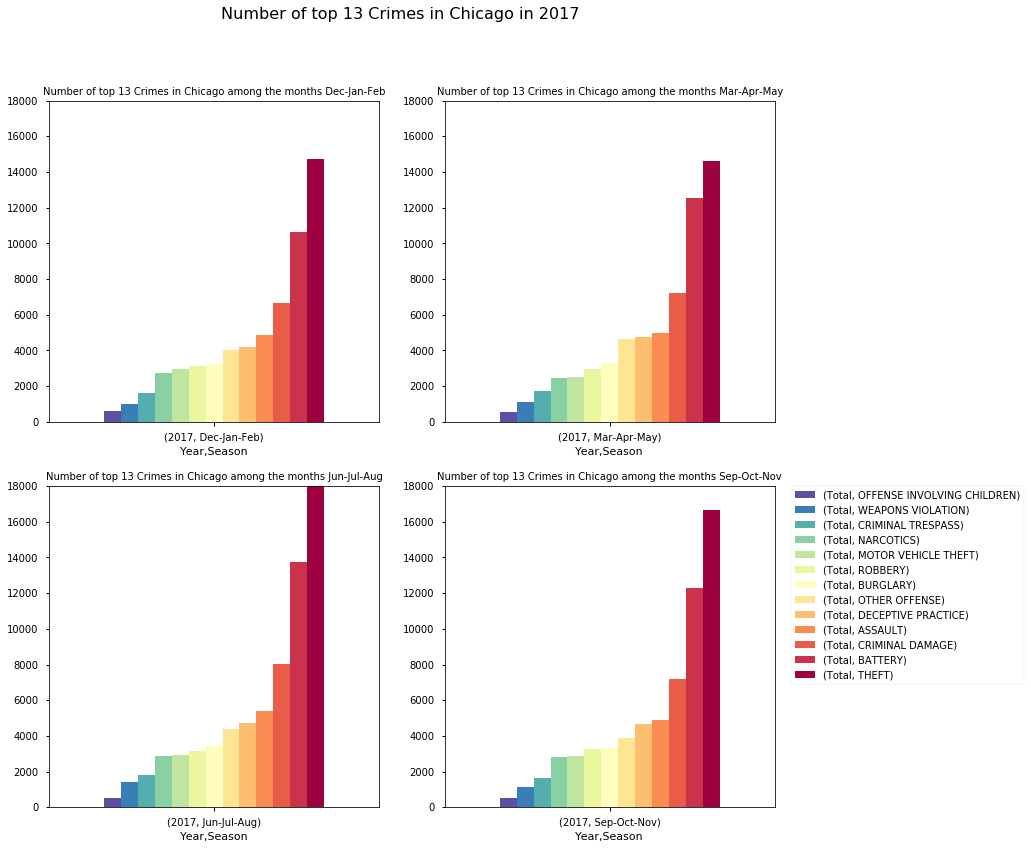

In [23]:
# Create a suplot for every season (winter,spring,summer,autumn ) in 2017
fig, ax = plt.subplots(2,2,figsize = (13,13))

fig.suptitle('Number of top 13 Crimes in Chicago in 2017', fontsize = 16)
ax[0,0].set_title('Number of top 13 Crimes in Chicago among the months Dec-Jan-Feb', fontsize = 10)
ax[0,1].set_title('Number of top 13 Crimes in Chicago among the months Mar-Apr-May', fontsize = 10)
ax[1,0].set_title('Number of top 13 Crimes in Chicago among the months Jun-Jul-Aug', fontsize = 10)
ax[1,1].set_title('Number of top 13 Crimes in Chicago among the months Sep-Oct-Nov', fontsize = 10)
ax[0,0].set_ylim(0,18000)
ax[0,1].set_ylim(0,18000)
ax[1,0].set_ylim(0,18000)
ax[1,1].set_ylim(0,18000)
crime_2017_winter.unstack(1).plot(kind = 'bar',ax=ax[0,0],width=1, linewidth = 4, rot=0,colormap="Spectral_r",legend=False)
crime_2017_spring.unstack(1).plot(kind = 'bar',ax=ax[0,1],width=1, linewidth = 4, rot=0,colormap="Spectral_r",legend=False)
crime_2017_summer.unstack(1).plot(kind = 'bar',ax=ax[1,0],width=1, linewidth = 4, rot=0,colormap="Spectral_r",legend=False)
crime_2017_autumn.unstack(1).plot(kind = 'bar',ax=ax[1,1],width=1, linewidth = 4, rot=0,colormap="Spectral_r")
#plt.legend(multi_total_crimes.index.get_level_values(1))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## iii. 2018

In [24]:
#Split seasons for 2018
crime_2018_winter = crime_2018[crime_2018.index.get_level_values(2)=='Dec-Jan-Feb']
crime_2018_spring = crime_2018[crime_2018.index.get_level_values(2)=='Mar-Apr-May']
crime_2018_summer = crime_2018[crime_2018.index.get_level_values(2)=='Jun-Jul-Aug']
crime_2018_autumn = crime_2018[crime_2018.index.get_level_values(2)=='Sep-Oct-Nov']

#### Run below cell again

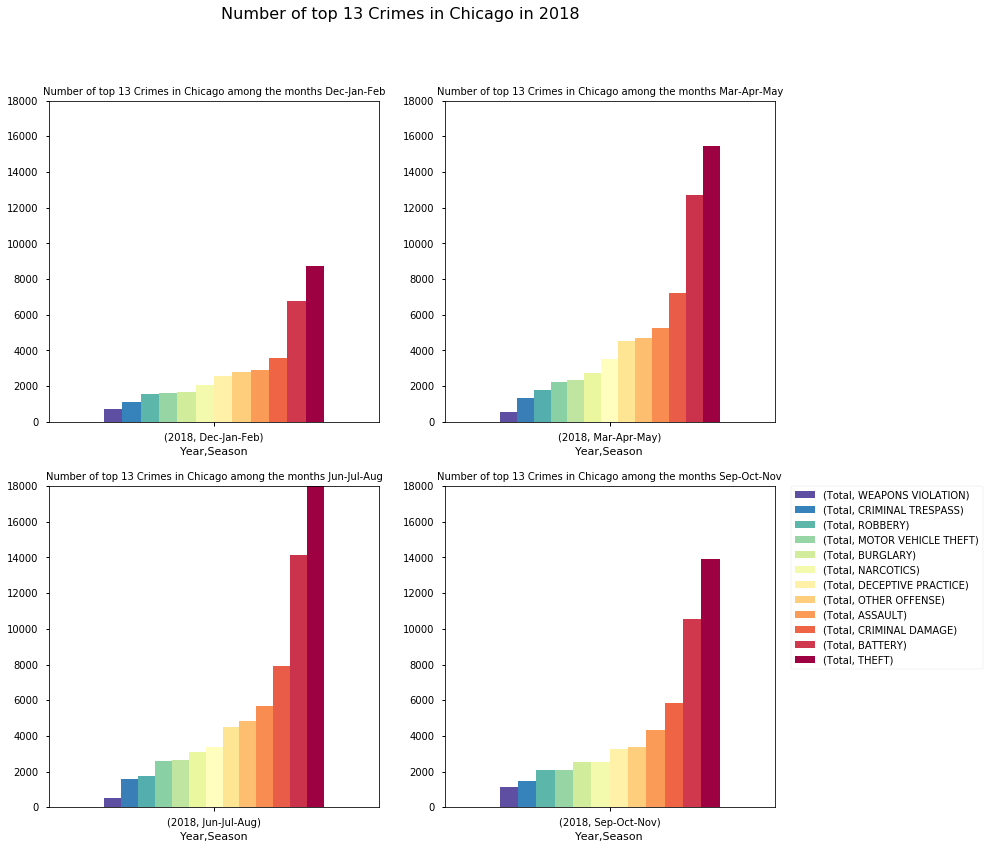

In [25]:
# Create a suplot for every season (winter,spring,summer,autumn ) in 2018
fig, ax = plt.subplots(2,2,figsize = (13,13))

#Set titles
fig.suptitle('Number of top 13 Crimes in Chicago in 2018', fontsize = 16)
ax[0,0].set_title('Number of top 13 Crimes in Chicago among the months Dec-Jan-Feb', fontsize = 10)
ax[0,1].set_title('Number of top 13 Crimes in Chicago among the months Mar-Apr-May', fontsize = 10)
ax[1,0].set_title('Number of top 13 Crimes in Chicago among the months Jun-Jul-Aug', fontsize = 10)
ax[1,1].set_title('Number of top 13 Crimes in Chicago among the months Sep-Oct-Nov', fontsize = 10)
ax[0,0].set_ylim(0,18000)
ax[0,1].set_ylim(0,18000)
ax[1,0].set_ylim(0,18000)
ax[1,1].set_ylim(0,18000)

crime_2018_winter.unstack(1).plot(kind = 'bar',ax=ax[0,0],width=1, linewidth = 4, rot=0,colormap="Spectral_r",legend=False)
crime_2018_spring.unstack(1).plot(kind = 'bar',ax=ax[0,1],width=1, linewidth = 4, rot=0,colormap="Spectral_r",legend=False)
crime_2018_summer.unstack(1).plot(kind = 'bar',ax=ax[1,0],width=1, linewidth = 4, rot=0,colormap="Spectral_r",legend=False)
crime_2018_autumn.unstack(1).plot(kind = 'bar',ax=ax[1,1],width=1, linewidth = 4, rot=0,colormap="Spectral_r")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Part II :Trend Analysis for intra day crimes

### We are going to find the hours (during the day) that criminal activity happens most frequently.

In [26]:
# Select the hour and type of crime
crime_hours = crime_data[['Hour','Primary Type']].set_index('Hour')
# Split the into 6 periods (4 hours every period) 
freq = crime_hours.resample('4h').count()
freq.head()

,Primary Type
Hour,
1900-01-01 00:00:00,95256
1900-01-01 04:00:00,57466
1900-01-01 08:00:00,132240
1900-01-01 12:00:00,164995
1900-01-01 16:00:00,171601


In [27]:
# Create durations
duration_list = ['12 AM to 4 AM','4 AM to 8 AM', '8 AM to 12 PM', '12 PM to 4 PM', '4 PM to 8 PM', '8 PM to 12 AM']
freq.reset_index(inplace=True)
# Convert datetime to string
freq = freq.astype(str)
# Create list with the datetime format
datetime_list = freq['Hour'].tolist()
# Create dictionary for mapping datetime format with period names
dict_hours = dict(zip(datetime_list, duration_list))
# Mapping
freq = freq.set_index('Hour').rename(index = dict_hours)
freq

,Primary Type
Hour,
12 AM to 4 AM,95256
4 AM to 8 AM,57466
8 AM to 12 PM,132240
12 PM to 4 PM,164995
4 PM to 8 PM,171601
8 PM to 12 AM,148250


In [28]:
freq.reset_index(inplace=True)
# Convert again to int
freq['Primary Type'] = freq['Primary Type'].astype(int)
# Convert to categorical and order categories
freq['Hour'] = pd.Categorical(freq['Hour'], categories = duration_list, ordered=True)

### We observe from the barplot below that the most common hours of criminality during the day is between 12 pm - 8 pm 

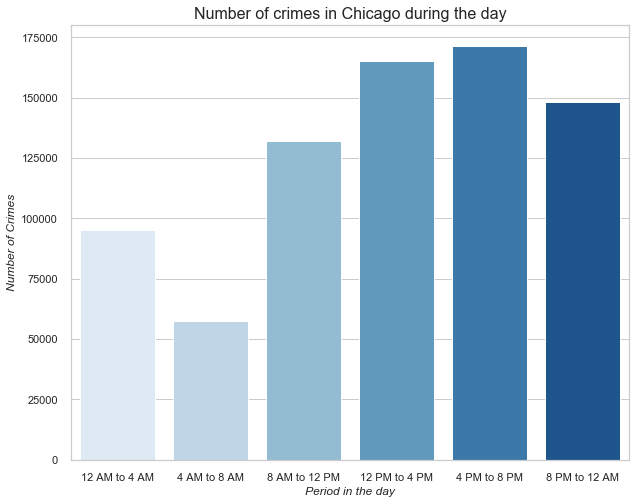

In [29]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
sns.barplot(x = 'Hour', y = 'Primary Type', data=freq.sort_values(by='Primary Type'), palette = 'Blues')
plt.title('Number of crimes in Chicago during the day', fontsize = 16)
plt.ylabel('Number of Crimes', fontsize=12, style='italic')
plt.xlabel('Period in the day', fontsize=12, style='italic')
plt.show()

### We conclude that the most common crime is 'THEFT' and most common hours of this activity are in the 'AFTERNOON'. Considering that the rates of crimes increasing in the 'SUMMER', we could possibly say that in that season there is less protection from police officers or people are less careful about their property (like tourists). For these reason seems easier to commit some types of crimes (eg theft)

# PLOTTING HEATMAPS

In [30]:
crime_freq_heat = crime_data[['Date', 'Primary Type']]
months = crime_freq_heat['Date'].dt.strftime('%B').values
crime_freq_heat.insert(loc = 1, column = 'Month', value= months)
crime_freq_heat = crime_freq_heat.set_index(['Month']).groupby(['Month','Primary Type'])['Primary Type'].count().reset_index(name='Total')
crime_freq_heat.head()

,Month,Primary Type,Total
0,April,ARSON,118
1,April,ASSAULT,4783
2,April,BATTERY,11928
3,April,BURGLARY,2856
4,April,CONCEALED CARRY LICENSE VIOLATION,18


In [31]:
# Ignore types of crimes with very few observations or inconsistent descriptions (like NON-CRIMINAL)
crime_freq_heat = crime_freq_heat.set_index('Primary Type').drop(['HUMAN TRAFFICKING','OTHER NARCOTIC VIOLATION','PUBLIC INDECENCY','NON-CRIMINAL','NON - CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)'],axis='index')
crime_freq_heat.reset_index(inplace=True)
# Order months
crime_freq_heat['Month'] = pd.Categorical(crime_freq_heat['Month'], categories = ["January","February", "March","April","May", "June", "July",
                                            "August", "September", "October", "November","December"], ordered=True)
# Order types of crimes based on frequency
crime_freq_heat['Primary Type'] = pd.Categorical(crime_freq_heat['Primary Type'],ordered = True, categories = ['THEFT', 'BATTERY',
        'CRIMINAL DAMAGE', 'ASSAULT',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'BURGLARY', 'NARCOTICS',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE', 'PROSTITUTION',
       'HOMICIDE', 'ARSON', 'LIQUOR LAW VIOLATION', 'GAMBLING',
       'KIDNAPPING', 'STALKING', 'INTIMIDATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'OBSCENITY'])
# Prepare dataframe for the heatmap
crime_freq_heat2 = crime_freq_heat[['Month', 'Primary Type', 'Total']].pivot("Month", "Primary Type", "Total")

## From the below heatmap, our first impression has been confirmed. The lightest color in the Heatmap is August and the most ferquent crime category is 'Theft'. The month July is the next one.

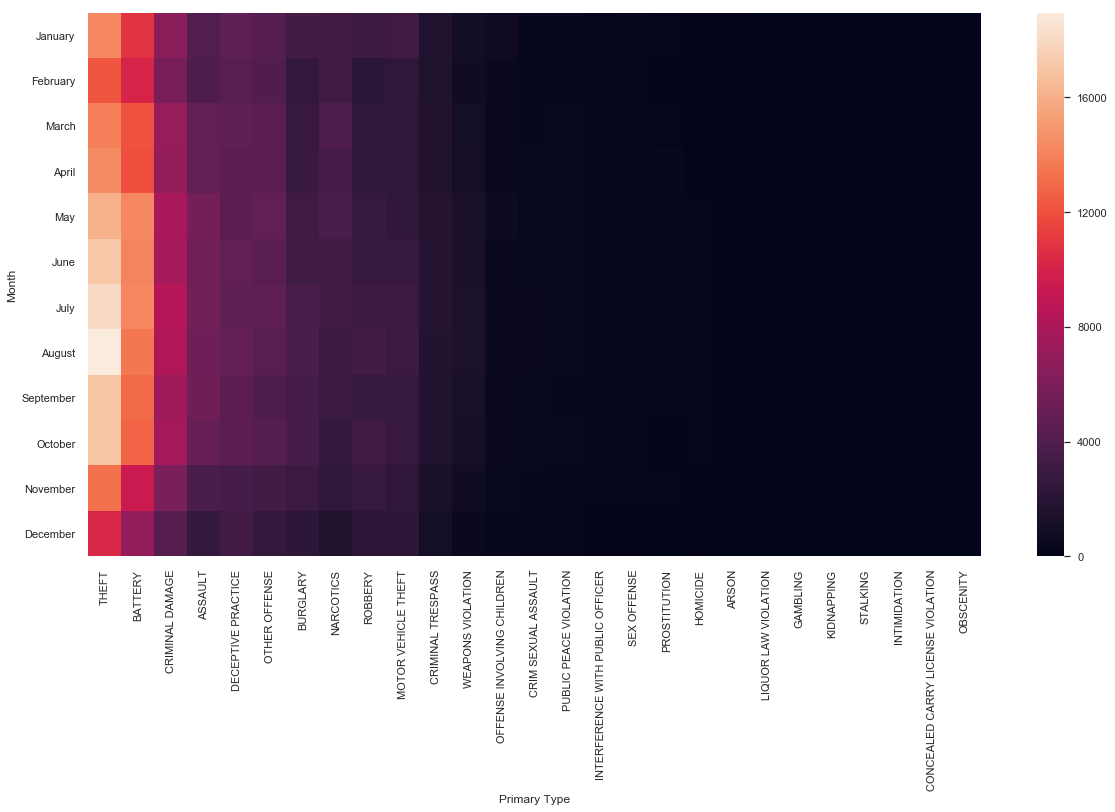

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(crime_freq_heat2)

# PLOTTING GEO DATA

### Firstly, choose the columns that you need

In [33]:
# Select category of crime, long & lat and corresponding district
crime_loc = crime_data[['Primary Type', 'Latitude','Longitude','District']]
crime_loc.head()

,Primary Type,Latitude,Longitude,District
0,SEX OFFENSE,41.808541,-87.621195,2.0
1,ROBBERY,41.782357,-87.718948,8.0
2,DECEPTIVE PRACTICE,42.012293,-87.699714,24.0
3,CRIMINAL DAMAGE,41.918712,-87.765511,25.0
4,OTHER OFFENSE,41.814670,-87.690727,9.0


In [34]:
#districts = crime_loc['District'].value_counts()
#districts

## Find the top 5 dangerous districts for the crime type 'THEFT'.

In [35]:
theft_per_district = crime_loc.loc[crime_loc['Primary Type']=='THEFT'][['Primary Type','District']].groupby(['Primary Type','District'])['District'].count()
top_5_districts = theft_per_district.nlargest(5).index.get_level_values(1)
top_5_districts

Float64Index([1.0, 18.0, 12.0, 19.0, 14.0], dtype='float64', name='District')

#### Find the mean value of latitude and longitude for each district of the above list

In [36]:
mean_lat_1 = crime_loc[(crime_loc['Primary Type']=='THEFT') & (crime_loc['District']==top_5_districts[0])][['Latitude','Longitude']].mean()[0]
mean_lat_2 = crime_loc[(crime_loc['Primary Type']=='THEFT') & (crime_loc['District']==top_5_districts[1])][['Latitude','Longitude']].mean()[0]
mean_lat_3 = crime_loc[(crime_loc['Primary Type']=='THEFT') & (crime_loc['District']==top_5_districts[2])][['Latitude','Longitude']].mean()[0]
mean_lat_4 = crime_loc[(crime_loc['Primary Type']=='THEFT') & (crime_loc['District']==top_5_districts[3])][['Latitude','Longitude']].mean()[0]
mean_lat_5 = crime_loc[(crime_loc['Primary Type']=='THEFT') & (crime_loc['District']==top_5_districts[4])][['Latitude','Longitude']].mean()[0]

In [37]:
mean_long_1 = crime_loc[(crime_loc['Primary Type']=='THEFT') & (crime_loc['District']==top_5_districts[0])][['Latitude','Longitude']].mean()[1]
mean_long_2 = crime_loc[(crime_loc['Primary Type']=='THEFT') & (crime_loc['District']==top_5_districts[1])][['Latitude','Longitude']].mean()[1]
mean_long_3 = crime_loc[(crime_loc['Primary Type']=='THEFT') & (crime_loc['District']==top_5_districts[2])][['Latitude','Longitude']].mean()[1]
mean_long_4 = crime_loc[(crime_loc['Primary Type']=='THEFT') & (crime_loc['District']==top_5_districts[3])][['Latitude','Longitude']].mean()[1]
mean_long_5 = crime_loc[(crime_loc['Primary Type']=='THEFT') & (crime_loc['District']==top_5_districts[4])][['Latitude','Longitude']].mean()[1]

#### Filter 5 dataframes with latitude, for the 5 districts

In [38]:
lat_1 = crime_loc.loc[(crime_loc['Primary Type'] == 'THEFT') & (crime_loc['District']==top_5_districts[0]),['Latitude','District']]
lat_2 = crime_loc.loc[(crime_loc['Primary Type'] == 'THEFT') & (crime_loc['District']==top_5_districts[1]),['Latitude','District']]
lat_3 = crime_loc.loc[(crime_loc['Primary Type'] == 'THEFT') & (crime_loc['District']==top_5_districts[2]),['Latitude','District']]
lat_4 = crime_loc.loc[(crime_loc['Primary Type'] == 'THEFT') & (crime_loc['District']==top_5_districts[3]),['Latitude','District']]
lat_5 = crime_loc.loc[(crime_loc['Primary Type'] == 'THEFT') & (crime_loc['District']==top_5_districts[4]),['Latitude','District']]

#### Filter 5 dataframes with longitude, for the 5 districts

In [39]:
lon_1 = crime_loc.loc[(crime_loc['Primary Type'] == 'THEFT') & (crime_loc['District']==top_5_districts[0]),['Longitude','District']]
lon_2 = crime_loc.loc[(crime_loc['Primary Type'] == 'THEFT') & (crime_loc['District']==top_5_districts[1]),['Longitude','District']]
lon_3 = crime_loc.loc[(crime_loc['Primary Type'] == 'THEFT') & (crime_loc['District']==top_5_districts[2]),['Longitude','District']]
lon_4 = crime_loc.loc[(crime_loc['Primary Type'] == 'THEFT') & (crime_loc['District']==top_5_districts[3]),['Longitude','District']]
lon_5 = crime_loc.loc[(crime_loc['Primary Type'] == 'THEFT') & (crime_loc['District']==top_5_districts[4]),['Longitude','District']]

#### Fill null values for latitude and longitude with above mean values

In [40]:
lat_1.fillna(mean_lat_1,inplace=True)
lat_2.fillna(mean_lat_2,inplace=True)
lat_3.fillna(mean_lat_3,inplace=True)
lat_4.fillna(mean_lat_4,inplace=True)
lat_5.fillna(mean_lat_5,inplace=True)

In [41]:
lon_1.fillna(mean_long_1,inplace=True)
lon_2.fillna(mean_long_2,inplace=True)
lon_3.fillna(mean_long_3,inplace=True)
lon_4.fillna(mean_long_4,inplace=True)
lon_5.fillna(mean_long_5,inplace=True)

In [42]:
print('{} {}'.format('The top 5 dangerous districts of crime type THEFT are:',top_5_districts.values))

The top 5 dangerous districts of crime type THEFT are: [ 1. 18. 12. 19. 14.]


## Find the top 5 dangerous districts for all the crime types

In [43]:
crime_per_district = crime_loc[['Primary Type','District']].groupby(['Primary Type','District'])['District'].count()

In [44]:
crime_per_district.head()

Primary Type  District
ARSON         1.0         13
              2.0         24
              3.0         39
              4.0         84
              5.0         86
Name: District, dtype: int64

In [45]:
crime_per_district.sort_values(ascending=False).head()

Primary Type  District
THEFT         1.0         20887
              18.0        20242
              12.0        12804
              19.0        12765
BATTERY       11.0        11079
Name: District, dtype: int64

In [46]:
# Select the top 10 districts with the highest number of crimes
top_15_districts = crime_per_district.nlargest(15).index.get_level_values(1).unique()
#THEFT
top_5_list = top_5_districts.values.tolist()
#ALL CRIMES
top_15_list = top_15_districts.values.tolist()

In [47]:
# Find the difference between the sets (districts that are not in the previous top 5)
new_top = list(set(top_15_list) - set(top_5_list))
new_top

[3.0, 4.0, 6.0, 7.0, 8.0, 10.0, 11.0]

In [48]:
# Identify the number of missing values
crime_loc.set_index('District').loc[[3.0, 4.0, 6.0, 7.0, 8.0, 10.0, 11.0]][['Latitude','Longitude']].isnull().sum()

Latitude     1351
Longitude    1351
dtype: int64

In [49]:
# Find the mean value of latitude and longitude for each district of the above list
crime_loc[crime_loc['District']==new_top[0]][['Latitude','Longitude']].mean()

Latitude     41.771171
Longitude   -87.596616
dtype: float64

In [50]:
mean_lat_6 = crime_loc[crime_loc['District']==new_top[0]][['Latitude','Longitude']].mean()[0]
mean_lat_7 = crime_loc[crime_loc['District']==new_top[1]][['Latitude','Longitude']].mean()[0]
mean_lat_8 = crime_loc[crime_loc['District']==new_top[2]][['Latitude','Longitude']].mean()[0]
mean_lat_9 = crime_loc[crime_loc['District']==new_top[3]][['Latitude','Longitude']].mean()[0]
mean_lat_10 = crime_loc[crime_loc['District']==new_top[4]][['Latitude','Longitude']].mean()[0]

In [51]:
mean_long_6 = crime_loc[crime_loc['District']==new_top[0]][['Latitude','Longitude']].mean()[1]
mean_long_7 = crime_loc[crime_loc['District']==new_top[1]][['Latitude','Longitude']].mean()[1]
mean_long_8 = crime_loc[crime_loc['District']==new_top[2]][['Latitude','Longitude']].mean()[1]
mean_long_9 = crime_loc[crime_loc['District']==new_top[3]][['Latitude','Longitude']].mean()[1]
mean_long_10 = crime_loc[crime_loc['District']==new_top[4]][['Latitude','Longitude']].mean()[1]

In [52]:
lat_6 = crime_loc.loc[crime_loc['District']==new_top[0],['Latitude','District']]
lat_7 = crime_loc.loc[crime_loc['District']==new_top[1],['Latitude','District']]
lat_8 = crime_loc.loc[crime_loc['District']==new_top[2],['Latitude','District']]
lat_9 = crime_loc.loc[crime_loc['District']==new_top[3],['Latitude','District']]
lat_10 = crime_loc.loc[crime_loc['District']==new_top[4],['Latitude','District']]

In [53]:
lon_6 = crime_loc.loc[crime_loc['District']==new_top[0],['Latitude','District']]
lon_7 = crime_loc.loc[crime_loc['District']==new_top[1],['Latitude','District']]
lon_8 = crime_loc.loc[crime_loc['District']==new_top[2],['Latitude','District']]
lon_9 = crime_loc.loc[crime_loc['District']==new_top[3],['Latitude','District']]
lon_10 = crime_loc.loc[crime_loc['District']==new_top[4],['Latitude','District']]

In [54]:
lat_6.fillna(mean_lat_6,inplace=True)
lat_7.fillna(mean_lat_7,inplace=True)
lat_8.fillna(mean_lat_8,inplace=True)
lat_9.fillna(mean_lat_9,inplace=True)
lat_10.fillna(mean_lat_10,inplace=True)

In [55]:
lon_6.fillna(mean_long_6,inplace=True)
lon_7.fillna(mean_long_7,inplace=True)
lon_8.fillna(mean_long_8,inplace=True)
lon_9.fillna(mean_long_9,inplace=True)
lon_10.fillna(mean_long_10,inplace=True)

### Create a map showing the top 5 districts

In [56]:
import folium
m = folium.Map(location=[41.8835, -87.627877], zoom_start = 12)

In [57]:
# District #1
folium.Circle(
    radius=500,
    location=[mean_lat_1, mean_long_1],
    popup='The Waterfront',
    color='crimson',
    fill=True,
).add_to(m)

# District # 18
folium.Circle(
    radius=500,
    location=[mean_lat_2, mean_long_2],
    popup='The Waterfront',
    color='crimson',
    fill=True,
).add_to(m)

# District # 12
folium.Circle(
    radius=500,
    location=[mean_lat_3, mean_long_3],
    popup='The Waterfront',
    color='crimson',
    fill=True,
).add_to(m)


# District # 19
folium.Circle(
    radius=500,
    location=[mean_lat_4, mean_long_4],
    popup='The Waterfront',
    color='crimson',
    fill=True,
).add_to(m)

# District # 14
folium.Circle(
    radius=500,
    location=[mean_lat_5, mean_long_5],
    popup='The Waterfront',
    color='crimson',
    fill=True,
).add_to(m)

folium.Circle(
    radius=500,
    location=[mean_lat_6, mean_long_6],
    popup='The Waterfront',
    color='blue',
    fill=False,
).add_to(m)


# District
folium.Circle(
    radius=500,
    location=[mean_lat_7, mean_long_7],
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(m)


# District
folium.Circle(
    radius=500,
    location=[mean_lat_8, mean_long_8],
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(m)


# District
folium.Circle(
    radius=50,
    location=[mean_lat_9, mean_long_9],
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(m)

#District
folium.Circle(
    radius=500,
    location=[mean_lat_10, mean_long_10],
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(m)

In [58]:
m